In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
da = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc",engine="netcdf4")

In [47]:
da.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 nan nan nan nan ... -1.784 -1.781 -1.778
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...>

In [115]:
res=[]


res = da.sst.isel(time=slice(0,680)).sel(lat=slice(-5,5),lon=slice(210,240))


temp = res[0:5].mean()
a = float(temp)
a.append(a)



AttributeError: 'float' object has no attribute 'append'

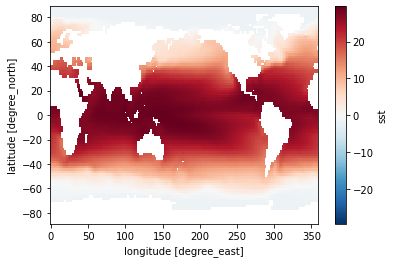

In [41]:
da.sst.mean(dim=['time']).plot()